IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

FABRICI-LOURENCO Tifenn  
DELAYE-MAILLOT Kyllian

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
import string

# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [3]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
print(len(newsgroups_df))
newsgroups_df

18846


,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [4]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


# Mini-Projet

## Pré-traitement des données

On commence par enlever les exemples avec message manquant.
Puis on met la version nettoyée de chaque message dans une nouvelle colonne *mots*

In [5]:
data = newsgroups_df.dropna().copy()
data["mots"] = data["messages"].map(lambda msg : ut.text2vect(msg, stop_words_df["stopword"].values))
print(len(data))
data

18466


,messages,target,mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


Puis on va prendre un échantillon d'environ 5000 exemples car 20000 c'est beaucoup trop grand pour nos machines.

In [6]:
sampled_data = ut.sample_dataset(data, "target", 500, seed=42)
print(len(sampled_data))
sampled_data

491


,messages,target,mots
14710,Archive-name: cryptography-faq/part05\nLast-mo...,11,"[archive, name, cryptography, faq, part05, las..."
14951,"\n\nWhat does ""DC"" stand for? Couldn't be an ...",13,"[dc, stand, antichiropractic, posting, chiropr..."
1258,: ============================================...,1,"[could, someone, please, tell, best, ftp'able,..."
11663,"Forwarded from Neal Ausman, Galileo Mission Di...",14,"[forwarded, neal, ausman, galileo, mission, di..."
17265,\nEnemy? Sounds like that's the viewpoint of ...,18,"[enemy, sounds, like, that's, viewpoint, stere..."
...,...,...,...
17714,"Here in Erie, PA there is a system in the inne...",12,"[erie, pa, system, inner, city, called, rado, ..."
6194,"\n\n\nFor what it's worth, I got my can in thr...",8,"[worth, got, three, days, chaparral, that's, u..."
14451,I've got a 386 motherboard for sale:\n\n i3...,6,"[got, 386, motherboard, sale, i386, 25dx, proc..."
15698,Excerpts from netnews.rec.autos: 24-Apr-93 Hon...,7,"[excerpts, netnews, rec, autos, 24, apr, 93, h..."


Nous stockons les labels (target) dans une variable dédiée.

In [7]:
labels = np.sort(sampled_data['target'].unique())

labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [8]:
word_index = ut.makeWordIndex(sampled_data["mots"])
print(len(word_index))
word_index

12895


['coverings',
 'bulldozerlets',
 'beneath',
 'henry',
 'xloadimage',
 'okay',
 'stray',
 'powers',
 'san',
 '61',
 'afford',
 'criminal',
 'convertor',
 'repulsion',
 'thug',
 'defragmenters',
 'escherknot',
 'humanity',
 'meshing',
 'repeatedly',
 'inductance',
 'stress',
 'occupied',
 'talibov',
 'excerpt',
 'phenomena',
 '510',
 'penalty',
 'remarked',
 'misguided',
 'programmers',
 'atf',
 'perhaps',
 'meshes',
 'roof',
 'deplorable',
 'xinfo',
 'hrudey',
 'commits',
 'breasts',
 'elminate',
 'hostname',
 'ny',
 'sequent',
 'desk',
 'michael',
 'parents',
 'shells',
 'theodore',
 'titan',
 '53',
 'sexuality',
 'races',
 '89',
 'rectify',
 'earler',
 'pleading',
 'offspring',
 'ideas',
 'tape',
 'weak',
 'welfare',
 'bauteile',
 'lease',
 'hardly',
 'deir',
 'dying',
 'legislation',
 'brag',
 'insistence',
 'winds',
 'pathetic',
 'formats',
 'cryptographic',
 'ontarian',
 'technical',
 'action',
 'generate',
 'stomach',
 'simultaneous',
 'feasible',
 '662',
 'sir',
 'aldus',
 'deriv

In [9]:
vec_data = ut.df2array(sampled_data, "mots", word_index)
vec_data.shape

(491, 12895)

On observe que la dimension des exemples est très très grande.
Il est nécessaire d'utiliser la PCA pour réduire la dimension.

### Application de la PCA

Dans un premier temps, on peut regarder quelles valeurs propres se démarquent

In [10]:
lam, V = ut.calcul_eigens(vec_data, labels)

V

TypeError: calcul_eigens() takes 1 positional argument but 2 were given

In [12]:
proj_data = ut.projection2D(vec_data, labels)
proj_data.shape

(491, 2)

On dispose maintenant d'un échantillon propre pour travailler dessus

In [13]:
proj_data

Array([[ 3.53497230e-02+6.70548826e-02j,  1.40342826e-03-1.95811782e-02j],
       [-6.87334803e-04+7.97160808e-03j,  2.06991751e-03-2.04554852e-03j],
       [-1.09626935e-03-1.09486177e-03j, -9.62667342e-04+5.91590710e-04j],
       [ 1.46778645e-02-1.40876500e-02j,  1.27788177e-02+2.85340124e-03j],
       [-1.19500700e-02-3.34581942e-03j,  1.61579251e-02+8.03658739e-04j],
       [-4.70583513e-03+2.27865981e-04j,  2.84384843e-03-1.66297157e-03j],
       [-2.05400051e-03-4.95452154e-03j,  3.30164796e-03+3.56198079e-03j],
       [-2.53648567e-03-2.16936955e-04j, -1.09182007e-03+2.22473915e-04j],
       [-1.03278561e-02+9.73503978e-04j, -1.49894995e-03+1.51203154e-03j],
       [ 4.75914276e-04-2.24871887e-03j, -4.41350887e-04-1.30458549e-03j],
       [-1.89114909e-03-2.18621036e-03j,  9.53878276e-03+4.29679127e-03j],
       [ 9.76980780e-04+1.20615412e-03j,  6.82595558e-03+9.64846928e-04j],
       [ 7.28440646e-05-9.43911029e-04j, -4.04118327e-03+6.05194655e-04j],
       [-9.58778523e-03-1

/home/tifennf/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/tifennf/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


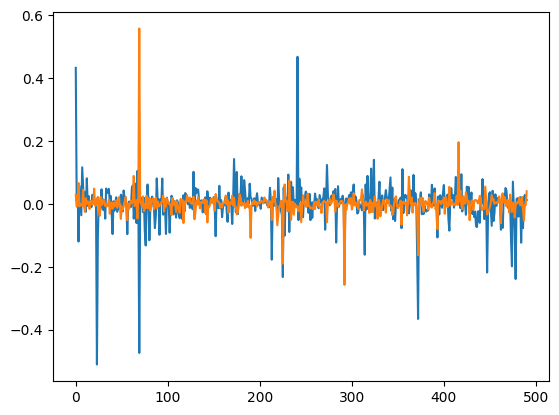

In [ ]:
plt.plot(proj_data)

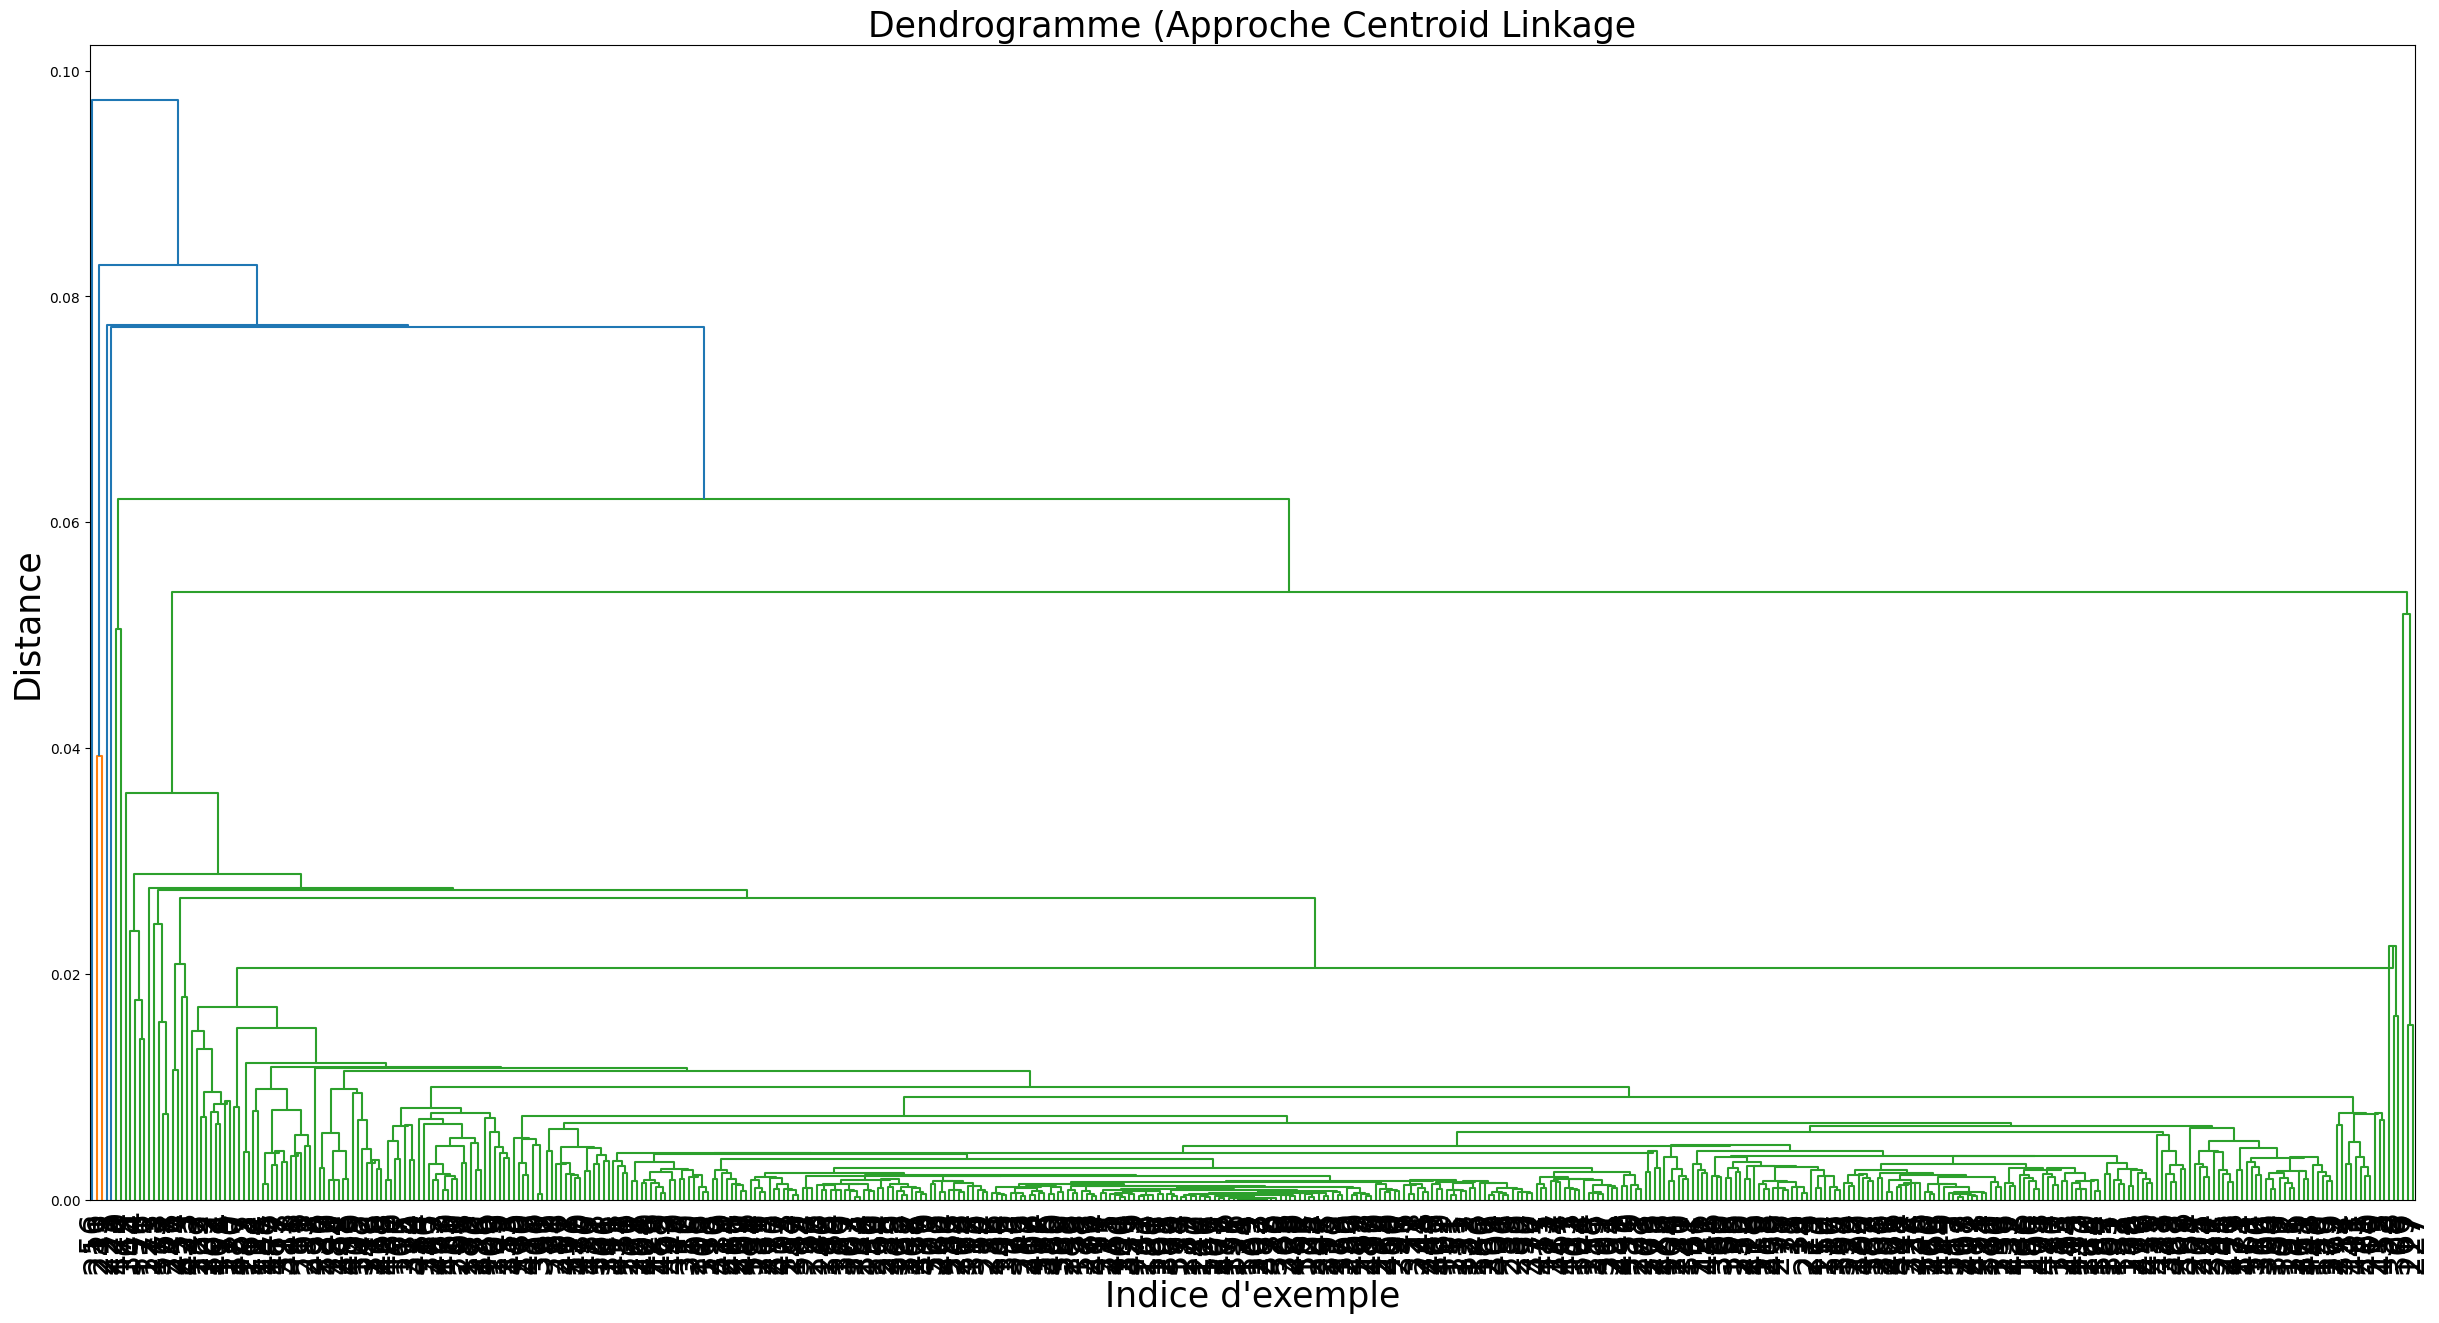

In [14]:

proj_data = pd.DataFrame(proj_data)
partition = clust.CHA(proj_data, "centroid", verbose=False, dendrogramme=True)